In [1]:
import numpy as np
import matplotlib.pyplot as plt

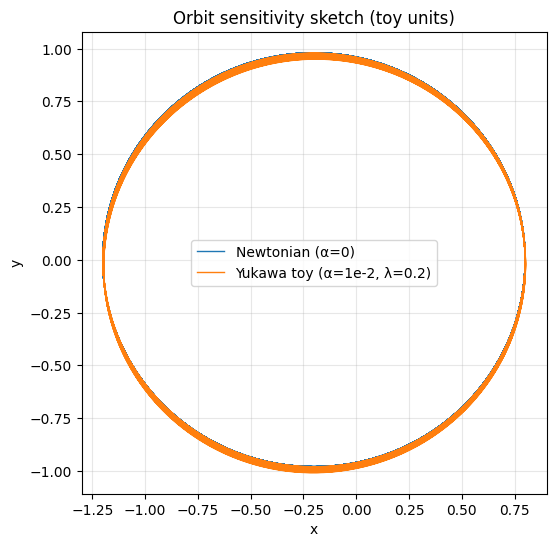

In [2]:
def accel(r: np.ndarray, alpha: float, lam: float) -> np.ndarray:
    # Central force with Yukawa-like correction (toy units; GM=1).
    rr = float(np.hypot(r[0], r[1]))
    if rr == 0.0:
        return np.zeros(2)
    base = -r / (rr ** 3)
    if alpha == 0.0:
        return base
    yuk = alpha * np.exp(-rr / lam) * (1.0 + rr / lam)
    return base * (1.0 + yuk)

def integrate(alpha: float, lam: float, dt: float = 2e-3, steps: int = 80000) -> np.ndarray:
    # Start near an ellipse in Kepler units.
    e = 0.2
    r = np.array([1.0 - e, 0.0], dtype=float)
    v = np.array([0.0, np.sqrt((1.0 + e) / (1.0 - e))], dtype=float)
    rs = np.empty((steps, 2), dtype=float)
    for i in range(steps):
        rs[i] = r
        # velocity Verlet
        a0 = accel(r, alpha, lam)
        r_new = r + v * dt + 0.5 * a0 * dt * dt
        a1 = accel(r_new, alpha, lam)
        v_new = v + 0.5 * (a0 + a1) * dt
        r, v = r_new, v_new
    return rs

rs0 = integrate(alpha=0.0, lam=1.0)
rs1 = integrate(alpha=1e-2, lam=0.2)

plt.figure(figsize=(6, 6))
plt.plot(rs0[:, 0], rs0[:, 1], linewidth=1, label='Newtonian (α=0)')
plt.plot(rs1[:, 0], rs1[:, 1], linewidth=1, label='Yukawa toy (α=1e-2, λ=0.2)')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Orbit sensitivity sketch (toy units)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()